# Examine NHS GPs - using GPs by GP Practices data (epracmem)
### The big question we want to answer in this "Examine NHS GPs" report are (1) why a practitioner left his or her organization? (2) Did it have anything to do with the rating or patients-per-practitioner of the practitioner's parent and new organizations?
### We only use GP Exits data from 2017-2019 for this report because the quality of the GP ratings can only be guaranteed for these three years.
### There is also an appendix to this report addressing some of the underlying assumptions made in the exploration down below.

***
***

## Definitions of terms

- **old practice** - the parent practice of a leaving practitioner
- **new practice** - the practice which a leaving practitioner was switching to
- **retirement** - a practitioner who retired from the industry and has not returned as of today
- **switch/ switcher** - a practitioner who moved to another practice
- **startup period/ startup** - the first six months since a new practice's first appearance in the panel data. Any practitioners who went to a new practice during its startup period are labeled as a startup
- **leave/ leaver** - either a retirement, switche, or startup.

***
***

## Important takeaways

- From 2017-2019, there were more retirements than switches, and there were few startups.
- Practitioners in general were moving to new practices with higher ratings, yet this indication might not be significant enough for us to draw a conclusion.
- Practitioners were trying to move to new practices that were (on average, about 15%) more successful and busy.
- The stayers' parent practices have significantly lower percentages for very low (< 2.0) ratings and slightly lower percentages for very high (> 4.0) ratings than the leavers' old practices.
- The old practices for leavers, in general, have significantly lower patients-per-practitioner than the parent practices for stayers.
- Most switchers moved to new practices within 20 miles.
- Practitioners were moving from practices with improving ratings to practices with declining ratings, so the change in ratings does not appear to be a factor for whether practitioners would leave their parent practices or where they would move to.
- The changes in patients-per-practitioner for the old and new practices played no roles in determining whether practitioners would leave their parent practices or where they would move to.
- The distributions of changes in patients-per-practitioner are similar between stayers and leavers.

***
***

### Read in the raw data
- **enrollment** - total number of patients enrolled, recorded on the first day of each month
- **practitioners** - records of all practitioners' leavings and enterings
- **reviews** - individual ratings for practices
- **mergers** - merger transactions between practices
- **geocode** - geographic locations (latitudes and longitudes) for practices

In [1]:
import practitioner_leave_writeup, practitioner_leave
import pandas as pd
enrollment = pd.read_stata("Data/Existing/Enrollment/gp_enrollment.dta")
practitioners = pd.read_csv("Data/epracmem/epracmem.csv", header = None, parse_dates = ["join_parent_date", "left_parent_date"],
                names = ["practitioner_code", "org_code", "parent_type", "join_parent_date", "left_parent_date", "amended"])
reviews = pd.read_stata("Data/Existing/Ratings/gp_reviews_combined.dta")
mergers = pd.read_stata("Data/Existing/Mergers/gp_mergers.dta")
geocode = pd.read_stata("Data/Existing/Geo/gp_practices_geocoded.dta")

**Clean and tranform the data for exploration**

In [2]:
leaves_panel = practitioner_leave.make_leaves_panel(practitioners, mergers)
ratings_compare = practitioner_leave.make_ratings(leaves_panel, reviews, offset_months = 24)
patients_per_practitioner = practitioner_leave.make_patients_per_practitioner(practitioners, leaves_panel, enrollment)

***
***

## 1. How often did practitioners leave their old practices? When they left their old practices, did they retire, or did they move to different practices?

#### The first stacked bar chart down below shows monthly total retirements, switches, and startups from 2017 - 2019.
#### The second stacked bar chart shows the same monthly total retirements, switches, and startups but as percentages of monthly total number of practitioners in the industry.

- There were more retirements than switches in general from 2017-2019.
- There were only a few startups just as we expected.
- March, June, and September of each year appear to have peaks.

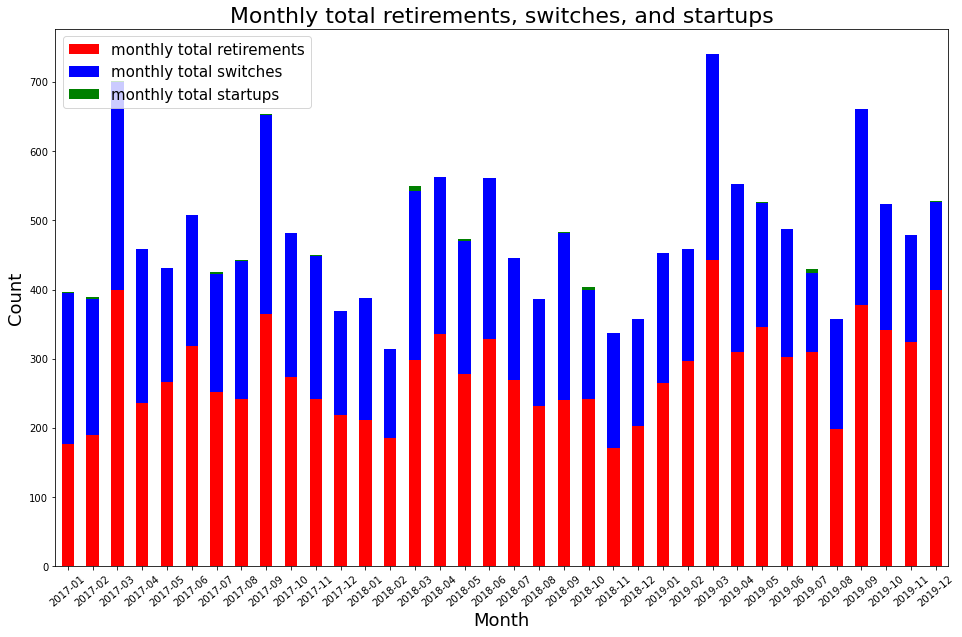

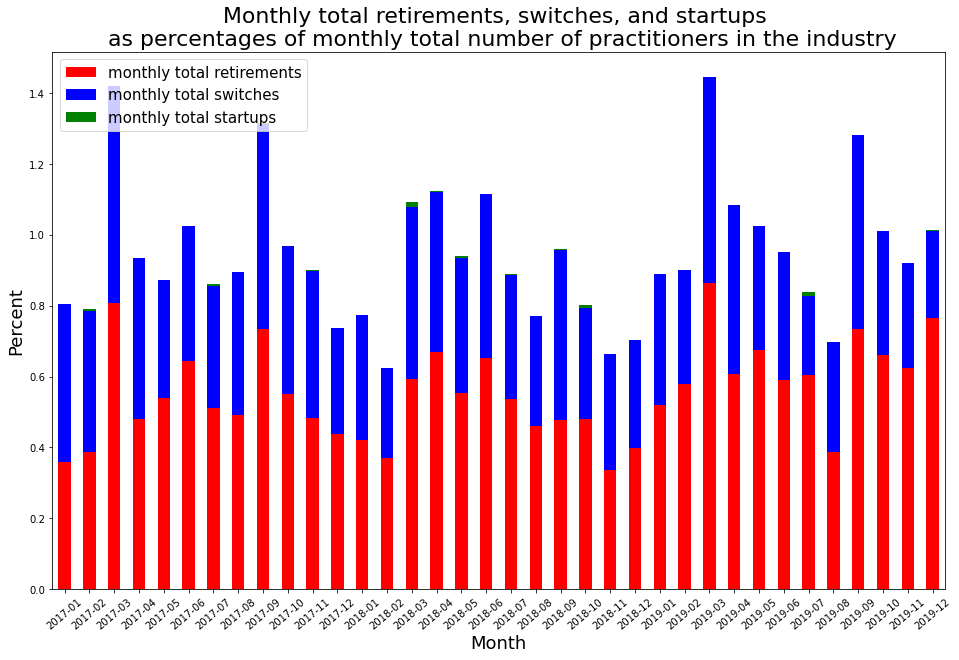

In [3]:
practitioner_leave_writeup.plot_monthly_leaves(leaves_panel, practitioners)

***
***

## 2. How did the ratings of the other practices compare when practitioners switched. (using switchers only)

### PART I: The x-axis of the joint plot down below is the most recent two-year average ratings for the old practices before the practitioners switched out. The y-axis is the most recent two-year average ratings for the new practices before the practitioners switched in.

- There are fewer points below the 45-degree line than above, indicating that practitioners in general were moving to new practices with higher ratings, yet this indication might not be significant enough for us to draw a conclusion.


- 53.14% of the old/ new rating pairs fall above the 45-degree line.
These are the practitioners who switched to practices with higher ratings.

- 2.0% of the pairs fall on the 45-degree line.
These are the practitioners who switched to practices with the same ratings.

- 44.86% of the pairs fall below the 45-degree line.
These are the practitioners who switched to practices with lower ratings.




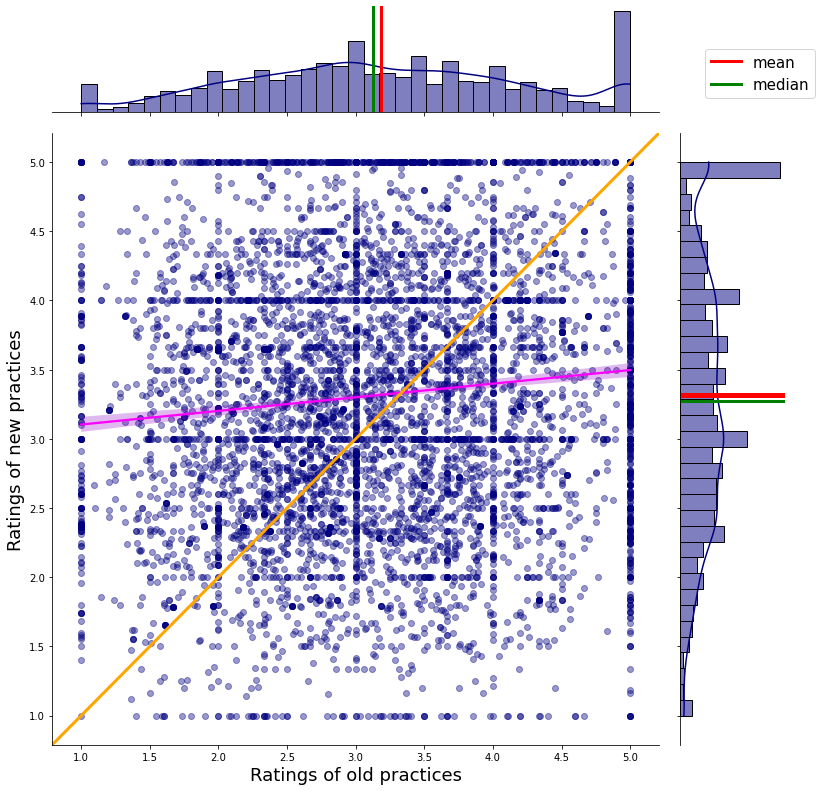

In [4]:
practitioner_leave_writeup.jointplot_ratings(ratings_compare)

### PART II: The histogram with density curve down below displays the differences in two-year average ratings between the old and new practices.

Note: The difference in ratings is equal to the ratings for the new practices minus the ratings for the old practices.


- The differences, on average, are greater than but very close to 0.

- 53.14% of the differences in average ratings are greater than 0.
Positive observations represent switchers who moved to practices with higher ratings.
Negative observations mean the opposite.




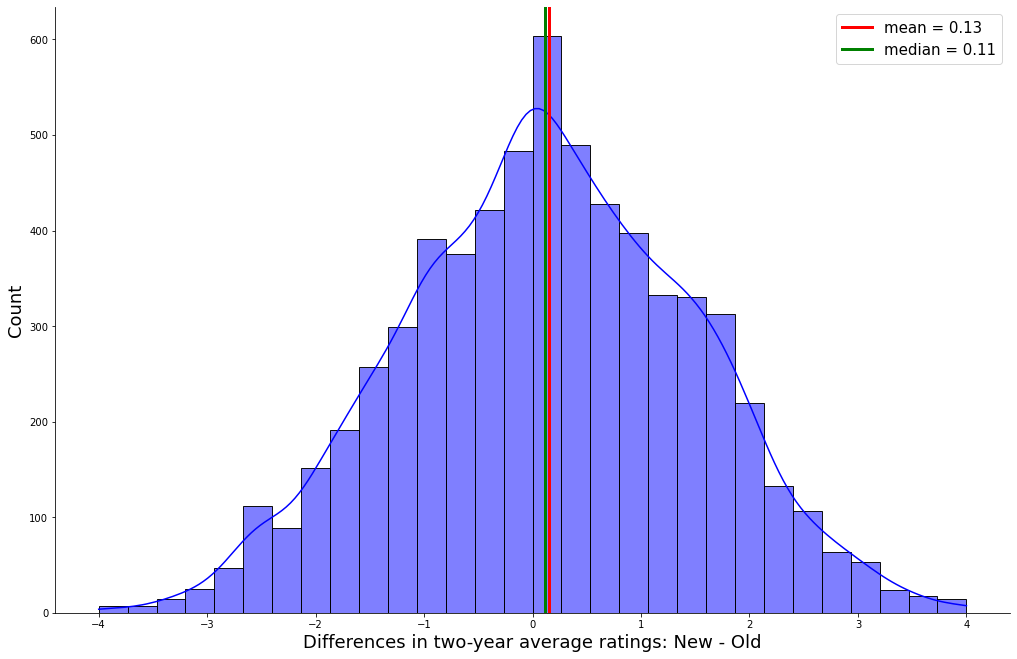

In [5]:
practitioner_leave_writeup.hist_diff_ratings(ratings_compare)

***
***

## 3. How did patients-per-practitioner compare between the old and new practices when practitioners switched to other practices? (using switchers only)
### PART I: The x-axis of the joint plot here is patients-per-practitioner for the old practices right before the practitioners switched out. The y-axis is patients-per-practitioner for the new practices right before the practitioners switched in.

Note: Patients-per-practitioner for the **old** practices includes all switching practitioners, but patients-per-practitioner for the **new** practices **does not** include any switching practitioners. The purpose for doing so is to avoid any practitioner enterings or leavings screwing up the numbers in the short-run.

Note: Patients-per-practitioner has been winsorized at the top and bottom 10th-percentiles to deal with unlikely extreme values.

- The economic meaning of patients-per-practitioner can relate to the success of a given practice as a business. Typically, the larger patients-per-practitioner a given practice has, the larger revenue the practice is expected to receive.


- 54.61% (winsorized)/ 58.58% (original) of the old/ new patients-per-practitioner pairs fall above the 45-degree line.
These are the practitioners who switched to practices with more patients-per-practitioner.

- 9.07% (winsorized)/ 0.0% (original) of the pairs fall on the 45-degree line.
These are the practitioners who switched to practices with the same amount of patients-per-practitioner.

- 36.32% (winsorized)/ 41.42% (original) of the pairs fall below the 45-degree line.
These are the practitioners who switched to practices with fewer patients-per-practitioner.

- The average percentage increase in patients-per-practitioner after the switch is 10.37% (winsorized)/ 15.01% (original).
- The formula here: mean (new - old) / mean old
That is, practitioners moved to new practices that were on average 10.37% (winsorized)/ 15.01% (original) more busy/ successful.




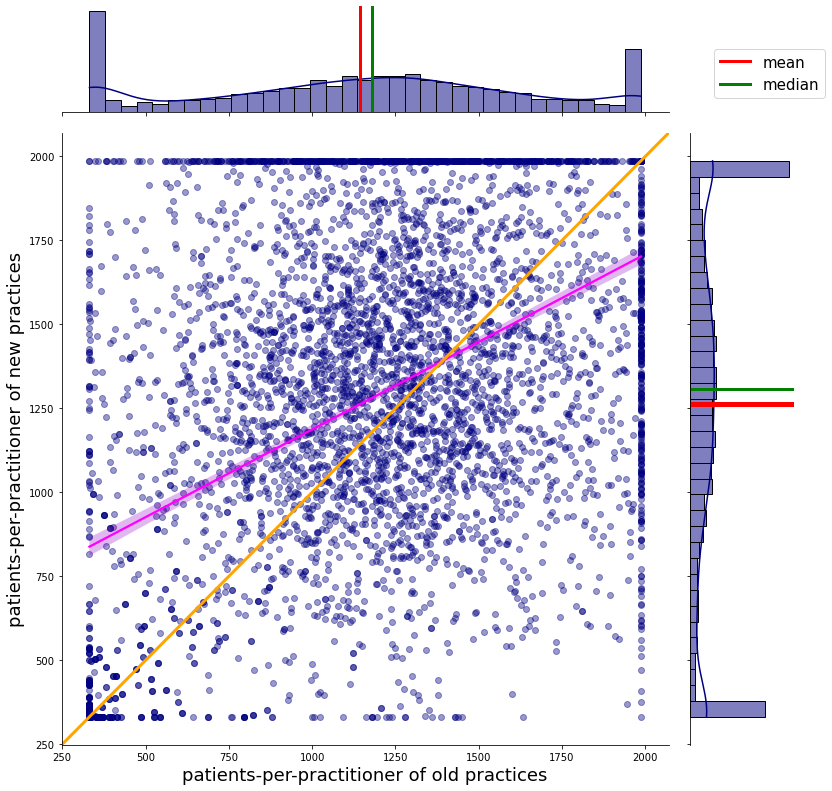

In [6]:
practitioner_leave_writeup.jointplot_patients_per_practitioner(patients_per_practitioner)

### PART II: The histogram with density curve down below shows the differences in patients-per-practitioner between the old and new practices.

- The distribution of differences in patients-per-practitioner between the old and new practices looks normal.
- About 59% of the switchers joined new practices that have larger patients-per-practitioner.


- 54.61% (winsorized)/ 58.58% (original) of the differences in patients-per-practitioner between the old and new practices are greater than 0.




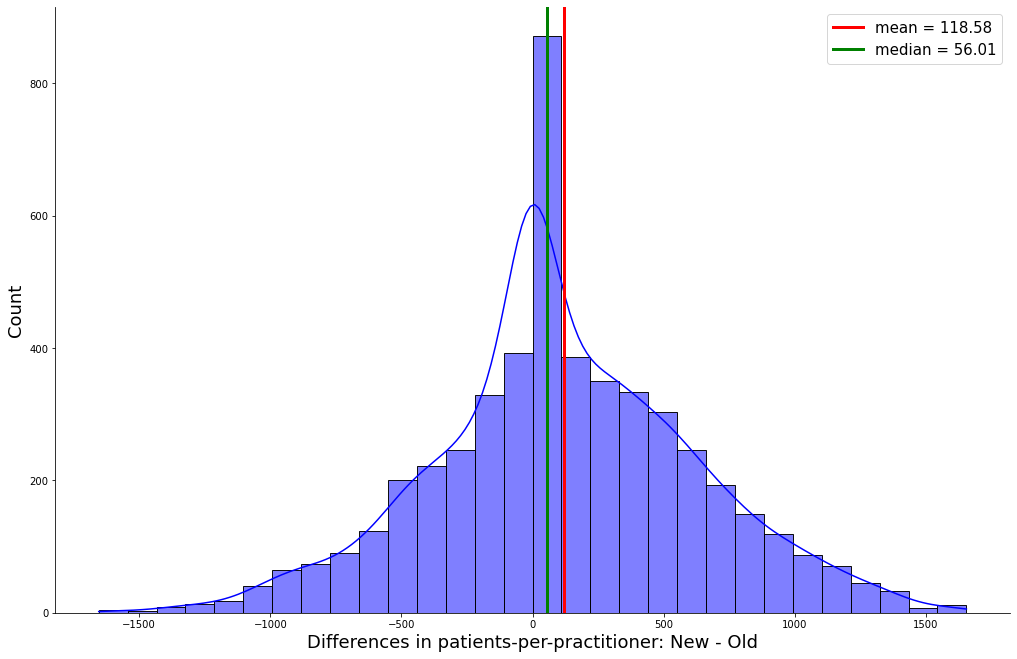

In [7]:
practitioner_leave_writeup.hist_diff_patients_per_practitioner(patients_per_practitioner)

***
***

## 4. How are the two-year average ratings for the old practices distributed across leave types?

Note: **Stayers** in a given year are practitioners who work(ed) at a practice from July 1 of the previous year to July 1 of the current year without leaving.

Note: Startups account for less than 3% of all leavers from 2017-2019.

- The two-year average ratings for old practices are similarly distributed between retirements and switches.
- The stayers' parent practices have significantly lower percentages for very low (< 2.0) ratings and slightly lower percentages for very high (> 4.0) ratings than the leavers' old practices.

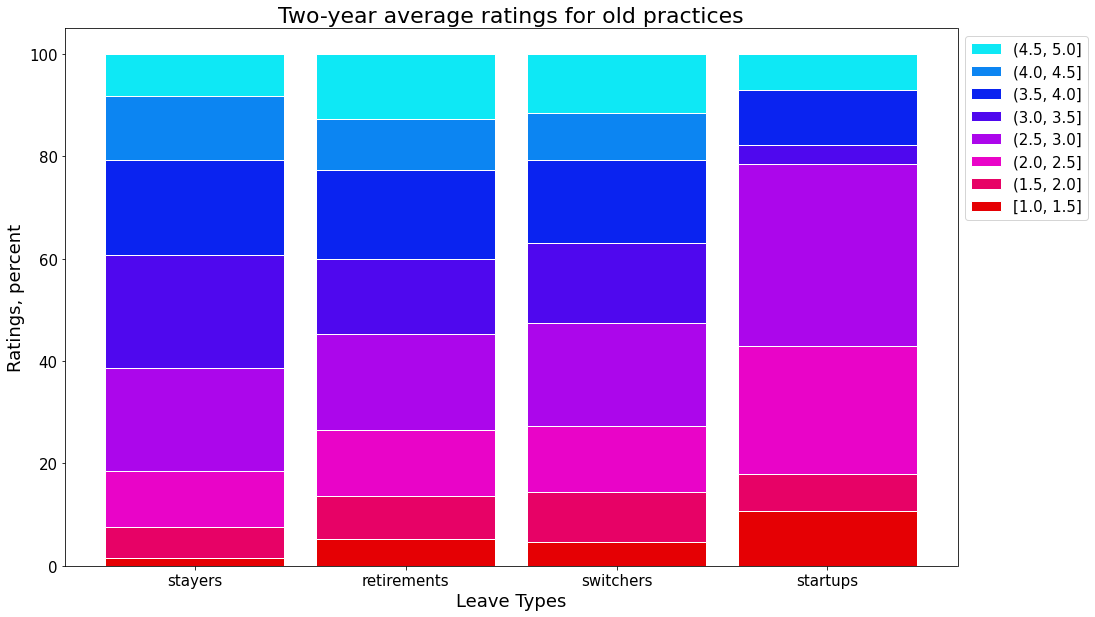

In [8]:
practitioner_leave_writeup.hist_old_ratings(leaves_panel, practitioners, reviews)

***
***

## 5. How are patients-per-practitioner at the old practices distributed across leave types?

Note: We sampled the stayers based on the number of leavers for each LSOA (location area code). Patients-per-practitioner for stayers is not as dispersed as it is for leavers. For example, if A has 1000 leavers, then we randomly sampled 1000 stayers from A. If B has 50 leavers, then we randomly sample 50 stayers from B.

- The distributions of patients-per-practitioner are extremely similar between retirements and switchers.
- The old practices for leavers, in general, have significantly lower patients-per-practitioner than the parent practices for stayers.

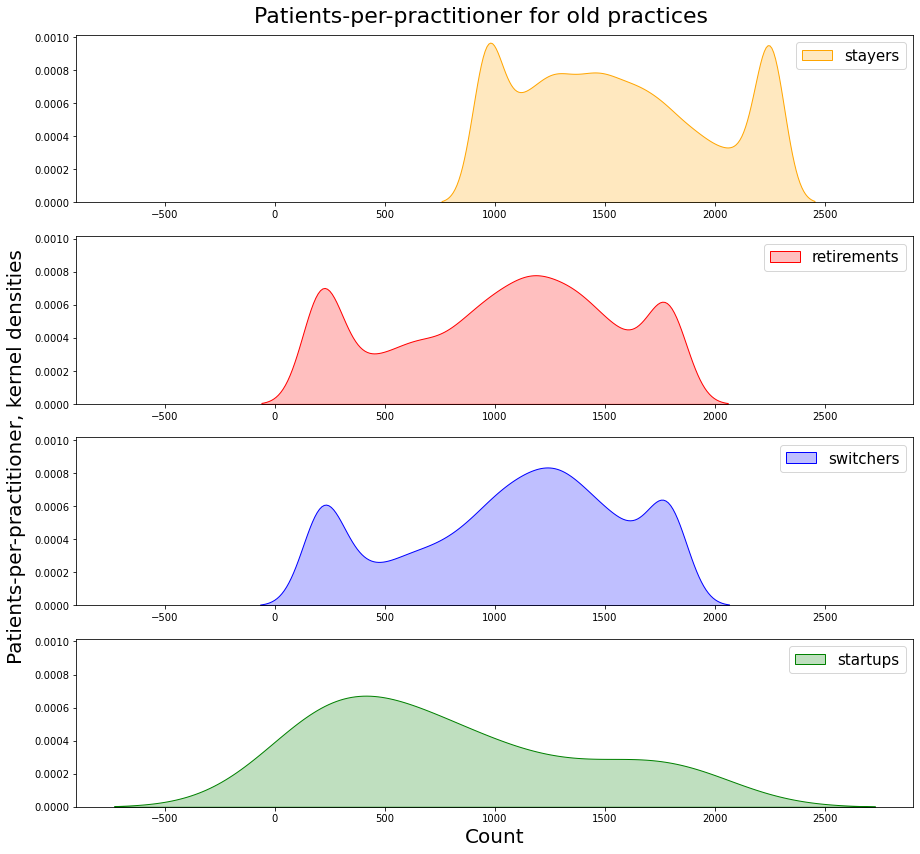

In [9]:
practitioner_leave_writeup.hist_old_patients_per_practitioner(practitioners, leaves_panel, enrollment, geocode,
                                                              random_state = 8)

***
***

## 6. Distances between the old and new practices

Note: Distance has been winsorized at the top 5th-percentiles. The peak at the end of the right tail stands for all values greater than the 95th-percentile.
- Most switchers moved to new practices within 20 miles.

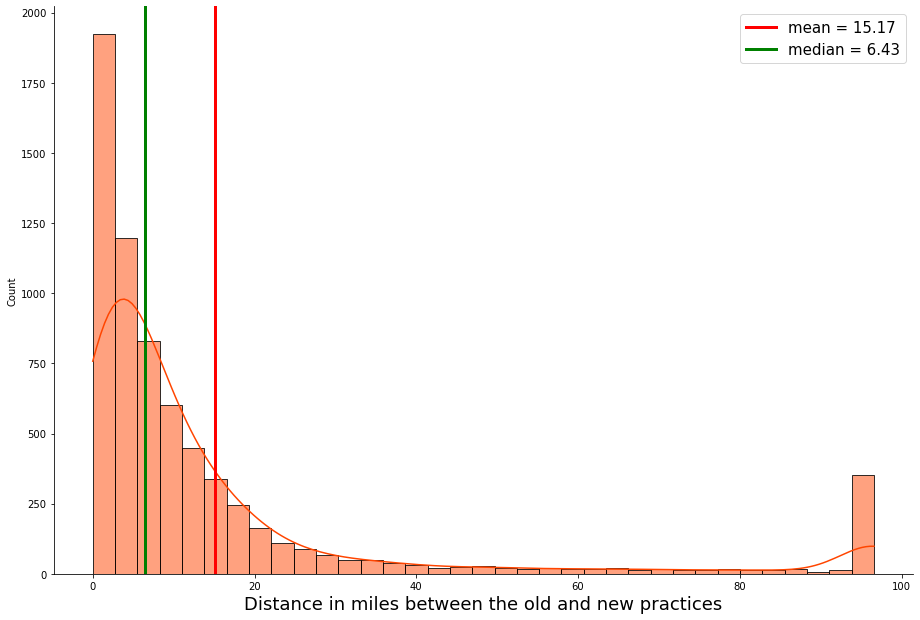

In [10]:
practitioner_leave_writeup.hist_distance(leaves_panel, geocode)

***
***

## 7. Did practitioners tend to move from declining practices to improving practices?
### PART I: Improvement/ decline in average ratings before practitioners left/ joined

Note: The improvement/ decline in ratings for a practice is measured by the difference in its six-month average rating right before the practitioner left/ joined and its six-month average rating 6 months before the practitioner left/ joined.

- Only 35% of the pairs fall above the 45-degree line, indicating that practitioners were moving from practices with increasing ratings to practices with decreasing ratings. So, the change in ratings does not appear to be a factor for whether practitioners would leave their parent practices or where they would move to.


- 35.07% of the pairs fall above the 45-degree line.

- 1.77% of the pairs fall on the 45-degree line.

- 63.16% of the pairs fall below the 45-degree line.




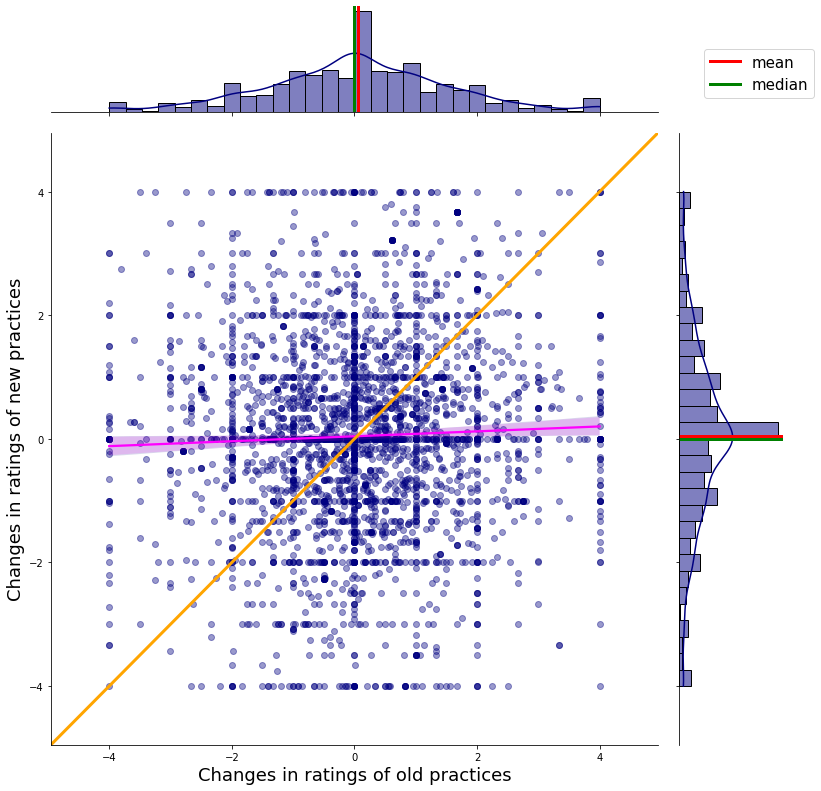

In [11]:
practitioner_leave_writeup.jointplot_ratings_growth(leaves_panel, reviews, offset_months_1 = 6, offset_months_2 = 12)

### PART II: Increase/ decrease in patients-per-practitioner before practitioners left/ joined

Note: The increase/ decrease in patients-per-practitioner for a practice is measured by the difference in its patients-per-practitioner right before the practitioners left/ joined and its patients-per-practitioner 6 months before the practitioner left/ joined.

- About 55% of the old/ new patients-per-practitioner growth pairs fall above the 45-degree line. These are the practitioners who moved to practices that were getting busier.
- It is hard to tell whether the changes in patients-per-practitioner for the old and new practices played a role in determining whether practitioners would leave their parent practices or where they would move to.


- 53.44% (winsorized)/ 55.32% (original) of the old/ new patients-per-practitioner growth pairs fall above the 45-degree line.

- 8.33% (winsorized)/ 0.02% (original) of the pairs fall on the 45-degree line.

- 38.23% (winsorized)/ 44.65% (original) of the pairs fall below the 45-degree line.




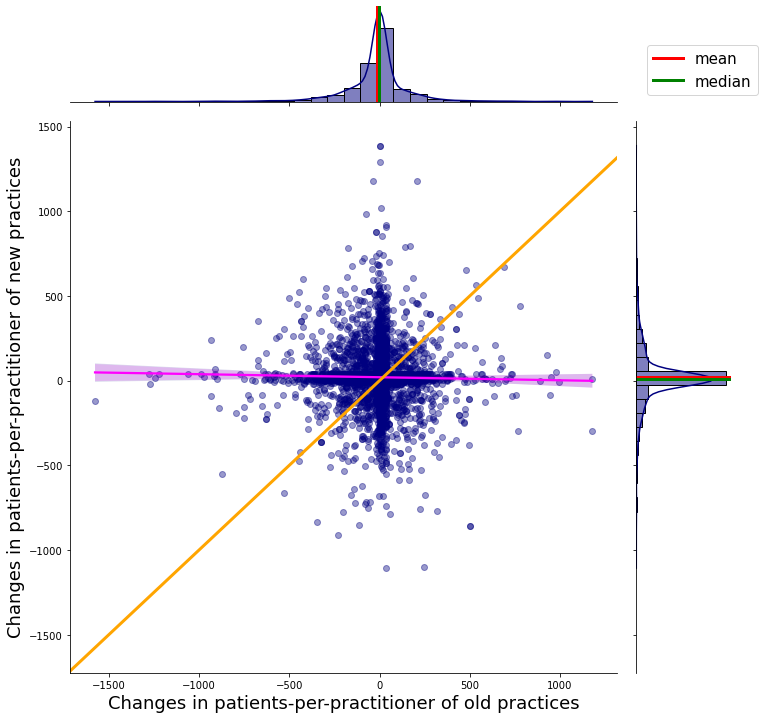

In [12]:
practitioner_leave_writeup.jointplot_patients_per_practitioner_growth(leaves_panel, practitioners,
                                                                      enrollment, offset_months = 6)

- The distributions of changes in patients-per-practitioner are similar between stayers and leavers.

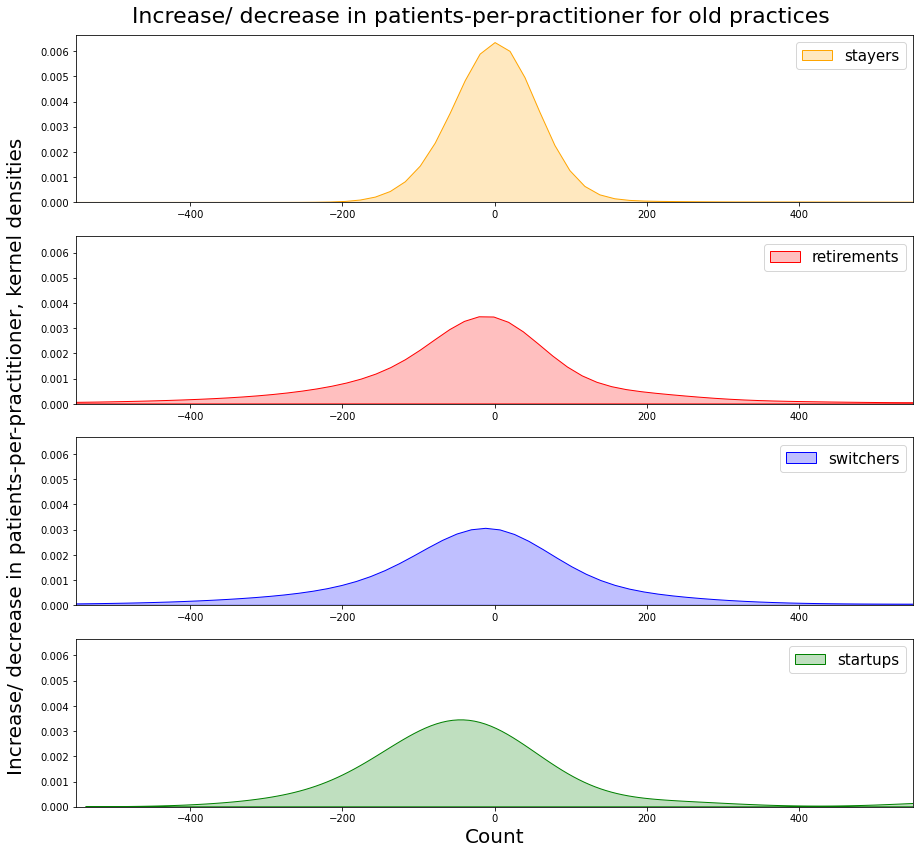

In [13]:
practitioner_leave_writeup.hist_old_patients_per_practitioner_growth(practitioners, leaves_panel, enrollment, geocode,
                                                                     random_state = 8, offset_months = 6)

***
***